In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full=pd.read_csv(r"C:\Users\HP\.jupyter\coffee_dataset.csv")
coffee_red=coffee_full.sample(200)

### Confidence Intervals - Part I

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [6]:
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [7]:
coffee_red.drinks_coffee.mean()

0.595

In [8]:
1-coffee_red.drinks_coffee.mean()

0.405

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [9]:
coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean()

66.78492279927877

In [10]:
coffee_red[coffee_red['drinks_coffee'] == True]['height'].mean()

68.11962990858618

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [11]:
bootstrap=coffee_red.sample(200,replace=True)

In [12]:
bootstrap.drinks_coffee.mean()

0.605

In [13]:
1-bootstrap.drinks_coffee.mean()

0.395

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

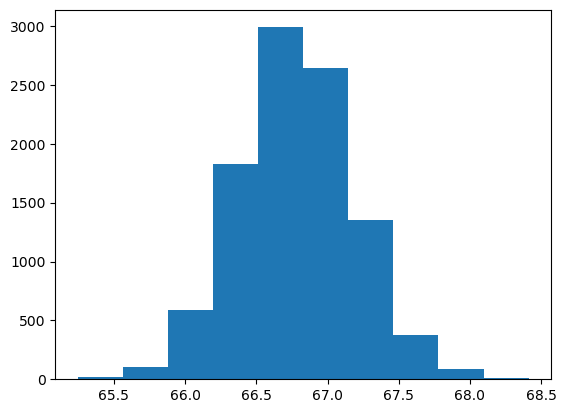

In [14]:
boot_mean=[]
for _ in range(10000):
    bootstrap=coffee_red.sample(200,replace=True)
    boot_mean_no=bootstrap[bootstrap['drinks_coffee'] == False]['height'].mean()
    boot_mean.append(boot_mean_no)
plt.hist(boot_mean);

In [15]:
np.percentile(boot_mean,2.5),np.percentile(boot_mean,97.5)

(65.99291328157521, 67.58402738281573)

`5.`  Did your interval capture the actual average height of coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [16]:
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.44340776214703

In [17]:
coffee_full[coffee_full['drinks_coffee']==False]['height']

0       64.538179
2       71.319854
5       63.491780
7       75.228046
8       66.353231
          ...    
2966    68.635009
2967    73.105804
2968    69.403964
2972    60.095933
2973    63.765869
Name: height, Length: 1220, dtype: float64

### Confidence Interval - Difference In Means


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [18]:
diff=[]
for _ in range(10000):
    bootstrap=coffee_red.sample(200,replace=True)
    d_co=bootstrap[bootstrap['drinks_coffee'] == True]['height'].mean()
    d_nco=bootstrap[bootstrap['drinks_coffee'] == False]['height'].mean()
    diff.append(d_co-d_nco)
np.percentile(diff,.5),np.percentile(diff,99)

(0.0902771292964006, 2.4040553119273835)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [19]:
diff_age=[]
for _ in range(10000):
    bootstrap=coffee_red.sample(200,replace=True)
    u21=bootstrap[bootstrap['age'] == '<21']['height'].mean()
    o21=bootstrap[bootstrap['age'] != '<21']['height'].mean()
    diff_age.append(o21-u21)
np.percentile(diff_age,.5),np.percentile(diff_age,99)

(3.366711378170795, 5.03776432889698)

`3.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [20]:
diff_age_21=[]
for _ in range(10000):
    bootstrap=coffee_red.sample(200,replace=True)
    u21c=bootstrap.query("age == '<21' and drinks_coffee == True")['height'].mean()
    u21nc=bootstrap.query("age == '<21' and drinks_coffee == False")['height'].mean()
    diff_age_21.append(u21nc-u21c)
np.percentile(diff_age_21,2.5),np.percentile(diff_age_21,97.5)

(1.0809572510875, 2.6258697660461725)

`4.` For 10,000 iterations bootstrap your sample data, compute the difference in the average height for coffee drinkers and the average height non-coffee drinkers for individuals under 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions.

In [21]:
diff_age_o21=[]
for _ in range(10000):
    bootstrap=coffee_red.sample(200,replace=True)
    o21c=bootstrap.query("age != '<21' and drinks_coffee == True")['height'].mean()
    o21nc=bootstrap.query("age != '<21' and drinks_coffee == False")['height'].mean()
    diff_age_o21.append(u21nc-u21c)
np.percentile(diff_age_o21,2.5),np.percentile(diff_age_o21,97.5)

(2.2477944854215366, 2.2477944854215366)

In [26]:
import numpy as np, statsmodels.stats.api as sms

X1= coffee_red[coffee_red['drinks_coffee'] == True]['height']
X2 = coffee_red[coffee_red['drinks_coffee'] == False]['height']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
cm.tconfint_diff(usevar='unequal')

(0.3960010615918562, 2.2734131570228913)